In [1]:
from fastai.tabular.all import *

/home/omlnaut/mambaforge/envs/pricing/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_feather('../data/train_raw.feather')
df.head()

,item_condition_id,category_name,brand_name,shipping,price
0,3,Men/Tops/T-shirts,None,1,10.0
1,3,Electronics/Computers & Tablets/Components & Parts,Razer,0,52.0
2,1,Women/Tops & Blouses/Blouse,Target,1,10.0
3,1,Home/Home Décor/Home Décor Accents,None,1,35.0
4,1,Women/Jewelry/Necklaces,None,0,44.0


In [3]:
df.dtypes

item_condition_id      int64
category_name         object
brand_name            object
shipping               int64
price                float64
dtype: object

In [10]:
dls = TabularDataLoaders.from_df(df, y_names="price", cat_names=['item_condition_id', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'brand_name', 'shipping'],  procs = [Categorify], device=torch.device('cuda'), bs=4096)

KeyError: 'Cat1'

In [5]:
dls.show_batch()

/home/omlnaut/mambaforge/envs/pricing/lib/python3.10/site-packages/fastai/tabular/core.py:284: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  to.conts = (to.conts*self.stds ) + self.means


,item_condition_id,category_name,brand_name,shipping,price
0,2,Beauty/Skin Care/Face,Sephora,0,29.0
1,3,Men/Shoes/Athletic,Air Jordan,0,56.0
2,3,Women/Tops & Blouses/T-Shirts,#na#,0,10.0
3,1,Beauty/Makeup/Makeup Sets,#na#,1,13.0
4,3,Women/Tops & Blouses/T-Shirts,PINK,1,14.0
5,1,Other/Daily & Travel items/Sports Nutrition,#na#,1,50.0
6,2,Electronics/Video Games & Consoles/Games,Nintendo,1,9.0
7,3,Kids/Boys 2T-5T/Tops & T-Shirts,#na#,1,4.0
8,3,Women/Shoes/Slippers,#na#,1,10.0
9,1,"Women/Athletic Apparel/Pants, Tights, Leggings",#na#,1,18.0


In [6]:
learn = tabular_learner(dls, metrics=mae)

SuggestedLRs(valley=0.033113110810518265)

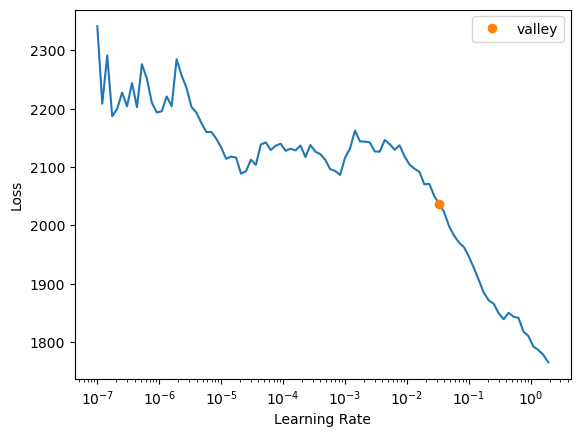

In [7]:
learn.lr_find()

In [8]:
learn.fit_one_cycle(10, lr_max=1e-1)

epoch,train_loss,valid_loss,mae,time
0,973.905701,1033.654907,13.403636,00:08
1,957.915588,1013.194641,13.702053,00:09
2,1019.391724,1000.350342,12.706553,00:09
3,988.351501,1031.801392,13.370322,00:08
4,981.081604,1006.601135,13.200371,00:08


KeyboardInterrupt: 

: 